#Comparing Glove/BERT

In [3]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 50.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 24.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.1 MB/s eta 0:00:0

In [4]:
import numpy as np
import pandas as pd
from flair.data import Sentence
from flair.embeddings import WordEmbeddings
from flair.embeddings import TransformerWordEmbeddings
from scipy.spatial import distance

In [7]:
# Glove Embedding Eamples

glove_embedding = WordEmbeddings('glove')

2023-06-10 14:17:15,034 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpwv103pn9


100%|██████████| 153M/153M [00:09<00:00, 16.4MB/s]

2023-06-10 14:17:25,333 copying /tmp/tmpwv103pn9 to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2023-06-10 14:17:26,117 removing temp file /tmp/tmpwv103pn9
2023-06-10 14:17:26,749 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmpigb9h4yd


100%|██████████| 20.5M/20.5M [00:02<00:00, 9.81MB/s]

2023-06-10 14:17:29,500 copying /tmp/tmpigb9h4yd to cache at /root/.flair/embeddings/glove.gensim
2023-06-10 14:17:29,526 removing temp file /tmp/tmpigb9h4yd


# Sentence 1

In [5]:
sentence_1 = Sentence("apple released iphone 12 pro max in 2020")

In [8]:
glove_embedding.embed(sentence_1)

[Sentence[8]: "apple released iphone 12 pro max in 2020"]

In [9]:
for token in sentence_1:
  print(token)
  print(token.embedding)
  print("\n")

Token[0]: "apple"
tensor([-0.5985, -0.4632,  0.1300, -0.0196,  0.4603, -0.3018,  0.8977, -0.6563,
         0.6686, -0.4916,  0.0376, -0.0509,  0.6451, -0.5388, -0.3765, -0.0431,
         0.5138,  0.1778,  0.2860,  0.9206, -0.4935, -0.4858,  0.6132,  0.7821,
         0.1925,  0.9123, -0.0556, -0.1251, -0.6569,  0.0686,  0.5563,  1.6110,
        -0.0074, -0.4888,  0.4549,  0.9610, -0.0634,  0.1743,  0.9814, -1.3125,
        -0.1580, -0.5430, -0.1389, -0.2615, -0.3691,  0.2684, -0.2438, -0.1948,
         0.6258, -0.7377,  0.3835, -0.7500, -0.3905,  0.0915, -0.3659, -1.4715,
        -0.4523,  0.2256,  1.1412, -0.3853, -0.0672,  0.5729, -0.3919,  0.3130,
        -0.2923, -0.9616,  0.1515, -0.2166,  0.2510,  0.0970,  0.2843,  1.4296,
        -0.5056, -0.5137, -0.4722,  0.3204,  0.0231,  0.2262, -0.0972,  0.8213,
         0.9260, -1.0086, -0.3864,  0.8641, -1.2060, -0.2853,  0.2265, -0.3877,
         0.4088,  0.5930,  0.3077,  0.8380, -0.6366, -0.4464, -0.4341, -0.7936,
        -0.2867, -0.03

In [10]:
sentence_1[0]

Token[0]: "apple"

In [11]:
sentence_1[0].embedding

tensor([-0.5985, -0.4632,  0.1300, -0.0196,  0.4603, -0.3018,  0.8977, -0.6563,
         0.6686, -0.4916,  0.0376, -0.0509,  0.6451, -0.5388, -0.3765, -0.0431,
         0.5138,  0.1778,  0.2860,  0.9206, -0.4935, -0.4858,  0.6132,  0.7821,
         0.1925,  0.9123, -0.0556, -0.1251, -0.6569,  0.0686,  0.5563,  1.6110,
        -0.0074, -0.4888,  0.4549,  0.9610, -0.0634,  0.1743,  0.9814, -1.3125,
        -0.1580, -0.5430, -0.1389, -0.2615, -0.3691,  0.2684, -0.2438, -0.1948,
         0.6258, -0.7377,  0.3835, -0.7500, -0.3905,  0.0915, -0.3659, -1.4715,
        -0.4523,  0.2256,  1.1412, -0.3853, -0.0672,  0.5729, -0.3919,  0.3130,
        -0.2923, -0.9616,  0.1515, -0.2166,  0.2510,  0.0970,  0.2843,  1.4296,
        -0.5056, -0.5137, -0.4722,  0.3204,  0.0231,  0.2262, -0.0972,  0.8213,
         0.9260, -1.0086, -0.3864,  0.8641, -1.2060, -0.2853,  0.2265, -0.3877,
         0.4088,  0.5930,  0.3077,  0.8380, -0.6366, -0.4464, -0.4341, -0.7936,
        -0.2867, -0.0344,  1.3431,  0.34

# Sentence 2

In [12]:
sentence_2 = Sentence("an apple a day keeps the doctor away")

In [13]:
glove_embedding.embed(sentence_2 )

[Sentence[8]: "an apple a day keeps the doctor away"]

In [14]:
for token in sentence_2:
  print(token)
  print(token.embedding)
  print("\n")

Token[0]: "an"
tensor([-0.4214, -0.1880,  0.4624, -0.1761,  0.3621,  0.3670,  0.2792,  0.1463,
        -0.0542,  0.4583,  0.0654, -0.3372,  0.0675, -0.3632,  0.5030, -0.0104,
         0.7283, -0.1756, -0.3400,  0.0729,  0.6448, -0.2391,  0.3838,  0.1386,
         1.0994, -0.2488, -0.1508, -0.4874, -0.2304,  0.0648, -0.7018,  0.8265,
         0.0613,  0.1853, -0.3016, -0.0222,  0.3430,  0.8033,  0.1714,  0.1546,
        -0.5076,  0.3957,  0.0543, -0.5308,  0.4825,  0.0862,  0.5958, -0.2238,
        -0.3955, -0.7304, -0.1028, -0.3917,  1.2290,  1.2129, -1.0365, -3.4971,
         0.1092, -1.0084,  1.9998,  0.7964,  0.3881,  0.4375,  0.0852,  0.3855,
         0.6199, -1.0320,  0.7012, -0.2246,  0.0794,  0.0913, -0.2120, -0.5543,
        -0.0534, -0.8020,  0.4680, -0.0501, -0.5742, -0.0848, -1.7227, -0.9429,
         0.9867,  0.3121, -0.3774,  0.0687, -0.7784, -0.2849,  0.8105,  0.4660,
        -0.1186, -0.9341,  0.3372,  0.0379, -0.1827, -0.0199,  0.2049, -0.4772,
        -0.4925, -0.5652,

In [15]:
sentence_2[1]

Token[1]: "apple"

In [16]:
sentence_2[1].embedding

tensor([-0.5985, -0.4632,  0.1300, -0.0196,  0.4603, -0.3018,  0.8977, -0.6563,
         0.6686, -0.4916,  0.0376, -0.0509,  0.6451, -0.5388, -0.3765, -0.0431,
         0.5138,  0.1778,  0.2860,  0.9206, -0.4935, -0.4858,  0.6132,  0.7821,
         0.1925,  0.9123, -0.0556, -0.1251, -0.6569,  0.0686,  0.5563,  1.6110,
        -0.0074, -0.4888,  0.4549,  0.9610, -0.0634,  0.1743,  0.9814, -1.3125,
        -0.1580, -0.5430, -0.1389, -0.2615, -0.3691,  0.2684, -0.2438, -0.1948,
         0.6258, -0.7377,  0.3835, -0.7500, -0.3905,  0.0915, -0.3659, -1.4715,
        -0.4523,  0.2256,  1.1412, -0.3853, -0.0672,  0.5729, -0.3919,  0.3130,
        -0.2923, -0.9616,  0.1515, -0.2166,  0.2510,  0.0970,  0.2843,  1.4296,
        -0.5056, -0.5137, -0.4722,  0.3204,  0.0231,  0.2262, -0.0972,  0.8213,
         0.9260, -1.0086, -0.3864,  0.8641, -1.2060, -0.2853,  0.2265, -0.3877,
         0.4088,  0.5930,  0.3077,  0.8380, -0.6366, -0.4464, -0.4341, -0.7936,
        -0.2867, -0.0344,  1.3431,  0.34

# Glove Distance between the same word in different sentences

In [17]:
glove_distance = distance.euclidean((sentence_1[0].embedding.detach().cpu().numpy()), (sentence_2[1].embedding.detach().cpu().numpy()))

In [18]:
print("Distance Between apple embedding for Glove = {}".format(glove_distance))

Distance Between apple embedding for Glove = 0.0


# This is the limitation of Glove, even tough Apple here are two different entities, it is not able to recognize that, as the cosine distance between them is zero. Which compel us to use state of art bert model.

# Bert Embedding

In [19]:
bert_embedding = TransformerWordEmbeddings(model='bert-base-multilingual-cased')

In [20]:
bert_embedding.embed(sentence_1)
for token in sentence_1:
  print(token)
  print(token.embedding)

Token[0]: "apple"
tensor([-5.9850e-01, -4.6321e-01,  1.3001e-01, -1.9576e-02,  4.6030e-01,
        -3.0180e-01,  8.9770e-01, -6.5634e-01,  6.6858e-01, -4.9164e-01,
         3.7557e-02, -5.0889e-02,  6.4510e-01, -5.3882e-01, -3.7650e-01,
        -4.3120e-02,  5.1384e-01,  1.7783e-01,  2.8596e-01,  9.2063e-01,
        -4.9349e-01, -4.8583e-01,  6.1321e-01,  7.8211e-01,  1.9254e-01,
         9.1228e-01, -5.5596e-02, -1.2512e-01, -6.5688e-01,  6.8557e-02,
         5.5629e-01,  1.6110e+00, -7.3642e-03, -4.8879e-01,  4.5493e-01,
         9.6105e-01, -6.3369e-02,  1.7432e-01,  9.8140e-01, -1.3125e+00,
        -1.5801e-01, -5.4301e-01, -1.3888e-01, -2.6146e-01, -3.6910e-01,
         2.6844e-01, -2.4375e-01, -1.9484e-01,  6.2583e-01, -7.3770e-01,
         3.8351e-01, -7.5004e-01, -3.9053e-01,  9.1498e-02, -3.6591e-01,
        -1.4715e+00, -4.5228e-01,  2.2560e-01,  1.1412e+00, -3.8526e-01,
        -6.7160e-02,  5.7288e-01, -3.9191e-01,  3.1302e-01, -2.9235e-01,
        -9.6157e-01,  1.5154e-01,

In [21]:
sentence_1[0].embedding.shape

torch.Size([868])

In [22]:
bert_embedding.embed(sentence_2)
for token in sentence_2:
  print(token)
  print(token.embedding)

Token[0]: "an"
tensor([-4.2140e-01, -1.8797e-01,  4.6241e-01, -1.7605e-01,  3.6212e-01,
         3.6701e-01,  2.7924e-01,  1.4634e-01, -5.4227e-02,  4.5834e-01,
         6.5416e-02, -3.3725e-01,  6.7505e-02, -3.6316e-01,  5.0302e-01,
        -1.0361e-02,  7.2826e-01, -1.7564e-01, -3.3996e-01,  7.2864e-02,
         6.4481e-01, -2.3908e-01,  3.8383e-01,  1.3858e-01,  1.0994e+00,
        -2.4883e-01, -1.5078e-01, -4.8738e-01, -2.3042e-01,  6.4788e-02,
        -7.0183e-01,  8.2654e-01,  6.1280e-02,  1.8531e-01, -3.0162e-01,
        -2.2151e-02,  3.4302e-01,  8.0331e-01,  1.7135e-01,  1.5462e-01,
        -5.0759e-01,  3.9572e-01,  5.4291e-02, -5.3081e-01,  4.8252e-01,
         8.6205e-02,  5.9585e-01, -2.2377e-01, -3.9550e-01, -7.3036e-01,
        -1.0279e-01, -3.9166e-01,  1.2290e+00,  1.2129e+00, -1.0365e+00,
        -3.4971e+00,  1.0923e-01, -1.0084e+00,  1.9998e+00,  7.9640e-01,
         3.8810e-01,  4.3746e-01,  8.5194e-02,  3.8549e-01,  6.1993e-01,
        -1.0320e+00,  7.0119e-01, -2

In [23]:
bert_distance = distance.euclidean((sentence_1[0].embedding.detach().cpu().numpy()), (sentence_2[1].embedding.detach().cpu().numpy()))

In [24]:
print("Distance Between apple embedding for BERT = {}".format(bert_distance))

Distance Between apple embedding for BERT = 15.98473072052002


In [25]:
from transformers import pipeline
from pylab import rcParams

In [26]:
rcParams['figure.figsize'] = 10,5

In [27]:
Zero_Shot_Classification_Model = pipeline('zero-shot-classification')

In [29]:
result = Zero_Shot_Classification_Model(
    sequences = "Can you  please order some Pizza and book an Uber to the nearest cinema house at 12pm?",
    candidate_labels = ['urgent', 'not urgent', 'phone', 'tablet', 'computer', 'food', 'outing', 'Cabs Travel','Flight Travel', 'Movies'],
    multi_class = True
)

In [ ]:
result

In [30]:
import matplotlib.pyplot as plt

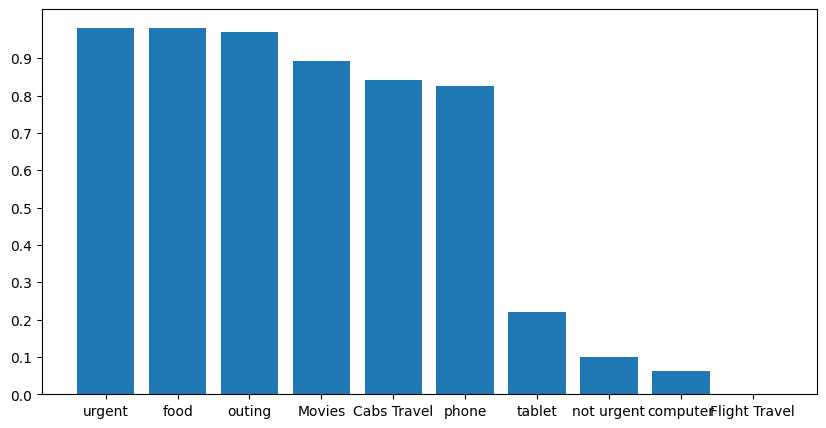

In [31]:
plt.bar(result['labels'], result['scores'])
plt.yticks(list(np.arange(0,1,0.1)))
plt.show()

# Bert Model Application

In [33]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 20.8 MB/s eta 0:00:00


In [34]:
import tensorflow_hub as hub
import tensorflow_text as text

In [35]:
# Base Model
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [36]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [37]:
text_test = ['nice movie indeed','I love python programming']

In [38]:
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [39]:
text_preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [40]:
text_preprocessed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [41]:
text_preprocessed['input_type_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [42]:
bert_model = hub.KerasLayer(encoder_url)

In [43]:
bert_results = bert_model(text_preprocessed)
bert_results

{'encoder_outputs': [<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
  array([[[ 0.12901425,  0.0064474 , -0.03614967, ...,  0.04999621,
            0.06149199, -0.02657534],
          [ 1.1753383 ,  1.2140784 ,  1.1569982 , ...,  0.11634377,
           -0.3585536 , -0.40490198],
          [ 0.03859022,  0.53869987, -0.21089768, ...,  0.21858197,
            0.7260166 , -1.1158605 ],
          ...,
          [-0.07587015, -0.25421888,  0.7075511 , ...,  0.50542   ,
           -0.18878672,  0.1502834 ],
          [-0.16066599, -0.28089687,  0.57597077, ...,  0.5275854 ,
           -0.11141385,  0.02887553],
          [-0.04428148, -0.20279586,  0.59093565, ...,  0.81338364,
           -0.3907581 , -0.02601735]],
  
         [[ 0.18903589,  0.02752547, -0.06513736, ..., -0.00620209,
            0.15053898,  0.03165447],
          [ 0.591615  ,  0.758914  , -0.07240664, ...,  0.6190398 ,
            0.829289  ,  0.16161953],
          [ 1.4460828 ,  0.44602656,  0.40990266, ...,  0

In [44]:
bert_results.keys()

dict_keys(['encoder_outputs', 'sequence_output', 'default', 'pooled_output'])

In [45]:
['nice movie indeed', 'I love Machine Learning algorithm']
bert_results['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.791774  , -0.21411902,  0.49769545, ...,  0.24465242,
        -0.47334465,  0.8175868 ],
       [-0.91712296, -0.47935185, -0.78656995, ..., -0.61751765,
        -0.71026856,  0.92184293]], dtype=float32)>

In [46]:
bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292041,  0.08567816,  0.14476837, ..., -0.0967708 ,
          0.08722115,  0.07711103],
        [ 0.17839377, -0.19006082,  0.50349444, ..., -0.05869827,
          0.32717147, -0.15578502],
        [ 0.18701456, -0.4338877 , -0.48875162, ..., -0.1550281 ,
          0.00145131, -0.24470958],
        ...,
        [ 0.12083077,  0.12884237,  0.46453524, ...,  0.07375517,
          0.17441934,  0.16522089],
        [ 0.07967839, -0.01190699,  0.5022542 , ...,  0.13777757,
          0.21002182,  0.0062461 ],
        [-0.07212706, -0.2830349 ,  0.5903332 , ...,  0.47551912,
          0.1666846 , -0.08920319]],

       [[-0.07900587,  0.36335132, -0.2110159 , ..., -0.17183743,
          0.16299748,  0.6724267 ],
        [ 0.27883568,  0.43716288, -0.35764778, ..., -0.04463685,
          0.3831519 ,  0.588798  ],
        [ 1.2037668 ,  1.0727028 ,  0.48408768, ...,  0.24921045,
          0.40730873,  0.4048177 ],
        ...,

In [47]:
bert_results['default']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.791774  , -0.21411902,  0.49769545, ...,  0.24465242,
        -0.47334465,  0.8175868 ],
       [-0.91712296, -0.47935185, -0.78656995, ..., -0.61751765,
        -0.71026856,  0.92184293]], dtype=float32)>

In [48]:
len(bert_results['encoder_outputs'])

12

In [49]:
bert_results['encoder_outputs'][0]

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.12901425,  0.0064474 , -0.03614967, ...,  0.04999621,
          0.06149199, -0.02657534],
        [ 1.1753383 ,  1.2140784 ,  1.1569982 , ...,  0.11634377,
         -0.3585536 , -0.40490198],
        [ 0.03859022,  0.53869987, -0.21089768, ...,  0.21858197,
          0.7260166 , -1.1158605 ],
        ...,
        [-0.07587015, -0.25421888,  0.7075511 , ...,  0.50542   ,
         -0.18878672,  0.1502834 ],
        [-0.16066599, -0.28089687,  0.57597077, ...,  0.5275854 ,
         -0.11141385,  0.02887553],
        [-0.04428148, -0.20279586,  0.59093565, ...,  0.81338364,
         -0.3907581 , -0.02601735]],

       [[ 0.18903589,  0.02752547, -0.06513736, ..., -0.00620209,
          0.15053898,  0.03165447],
        [ 0.591615  ,  0.758914  , -0.07240664, ...,  0.6190398 ,
          0.829289  ,  0.16161953],
        [ 1.4460828 ,  0.44602656,  0.40990266, ...,  0.48255897,
          0.6269114 ,  0.13463427],
        ...,

In [50]:
text_test = ['nice movie indeed','I love python programming']
bert_results['encoder_outputs'][-1] == bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])>